In [1]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
with open('mp_result.pickle', 'rb') as f:
    a = pickle.load(f)

In [3]:
a

[('y2000', 181258, 32465),
 ('y2001', 1132077, 291551),
 ('y2002', 2514300, 449339),
 ('y2003', 3660353, 469640),
 ('y2004', 3621212, 478857),
 ('y2005', 3638143, 486618),
 ('y2006', 3339248, 430239),
 ('y2007', 3643010, 498586),
 ('y2008', 3486630, 393640),
 ('y2009', 3212997, 371464),
 ('y2010', 3330229, 459849),
 ('y2012', 3440429, 522539),
 ('y2013', 3025981, 354973),
 ('y2014', 3123710, 412880),
 ('y2015', 3308406, 484942),
 ('y2016', 3118733, 410105),
 ('y2017', 3112795, 457871),
 ('y2018', 2954998, 397293),
 ('y2019', 849627, 114123)]

In [4]:
yr = [int(i[0][1:]) for i in a]
day_cts = [i[1] for i in a]
night_cts = [i[2] for i in a]

In [5]:
df = pd.DataFrame({'year': yr, 'day_counts':day_cts, 'night_counts':night_cts})

In [7]:
df

,year,day_counts,night_counts
0,2000,181258,32465
1,2001,1132077,291551
2,2002,2514300,449339
3,2003,3660353,469640
4,2004,3621212,478857
5,2005,3638143,486618
6,2006,3339248,430239
7,2007,3643010,498586
8,2008,3486630,393640
9,2009,3212997,371464


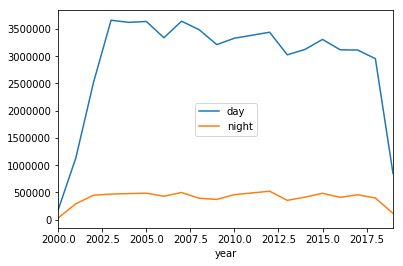

In [8]:
ax = df.plot(y='day_counts', x='year', label='day')
df.plot(y='night_counts', x='year', ax=ax, label='night')
# plt.legend('upper left')

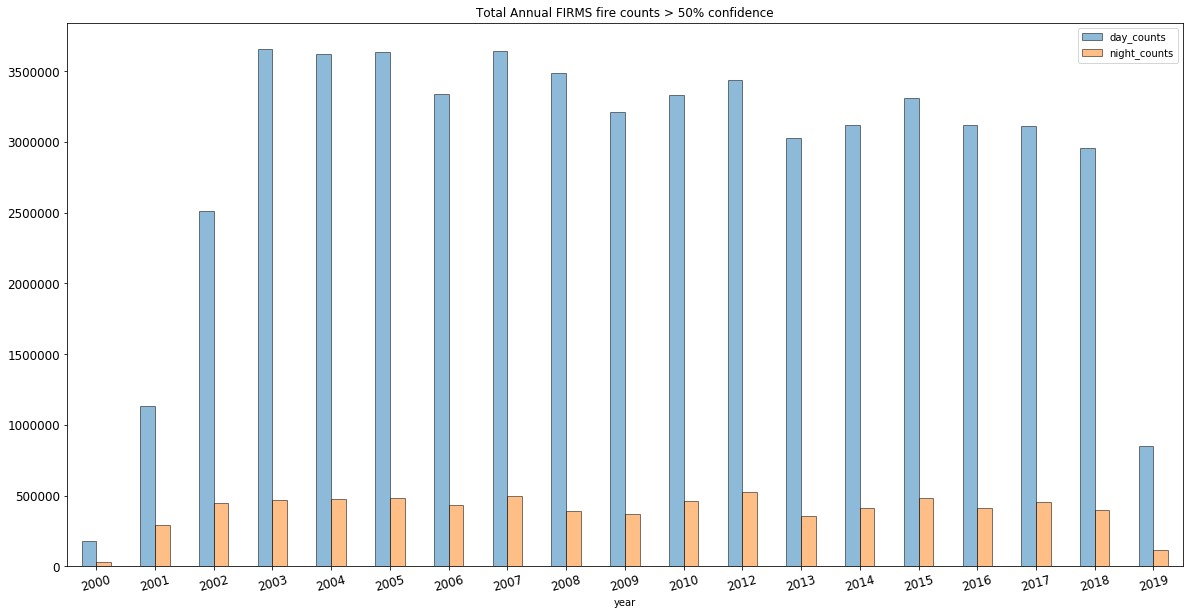

In [9]:
df.plot(kind='bar', x='year', y=['day_counts', 'night_counts'], 
        figsize=(20,10), rot=15, alpha=0.5, edgecolor='k',
       title='Total Annual FIRMS fire counts > 50% confidence', fontsize=12)

In [10]:
df_perc = df.copy()

In [21]:
df_perc['total_counts'] = df_perc['day_counts'] + df_perc['night_counts']
df_perc['night_perc'] = df_perc['night_counts'] / df_perc['total_counts']
df_perc['day_perc'] = df_perc['day_counts'] / df_perc['total_counts']
df_perc

,year,day_counts,night_counts,total_counts,night_perc,day_perc
0,2000,181258,32465,213723,0.151902,0.848098
1,2001,1132077,291551,1423628,0.204794,0.795206
2,2002,2514300,449339,2963639,0.151617,0.848383
3,2003,3660353,469640,4129993,0.113714,0.886286
4,2004,3621212,478857,4100069,0.116792,0.883208
5,2005,3638143,486618,4124761,0.117975,0.882025
6,2006,3339248,430239,3769487,0.114137,0.885863
7,2007,3643010,498586,4141596,0.120385,0.879615
8,2008,3486630,393640,3880270,0.101447,0.898553
9,2009,3212997,371464,3584461,0.103632,0.896368


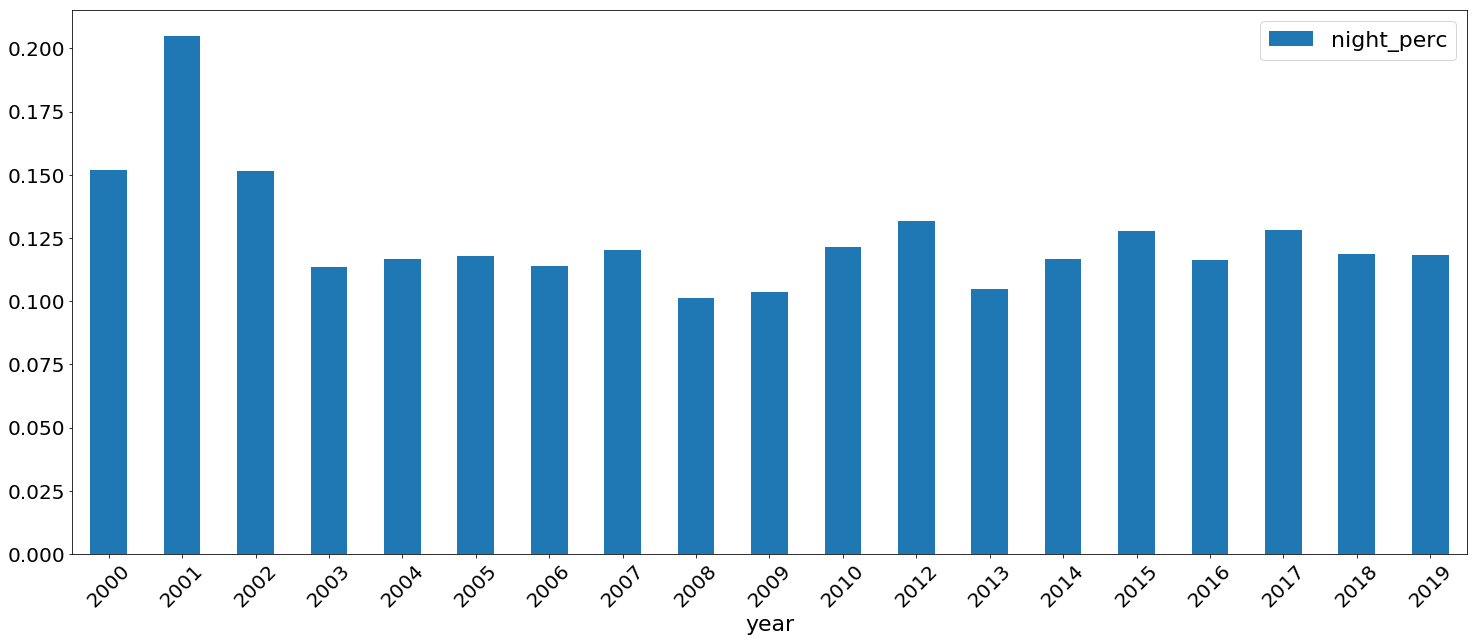

In [20]:
df_perc.plot(kind='bar', x='year', y='night_perc', rot=45,
            figsize=(25,10), fontsize=20)
plt.xlabel('year', fontsize=22)
plt.legend(fontsize=22)

(0.0, 1.2)

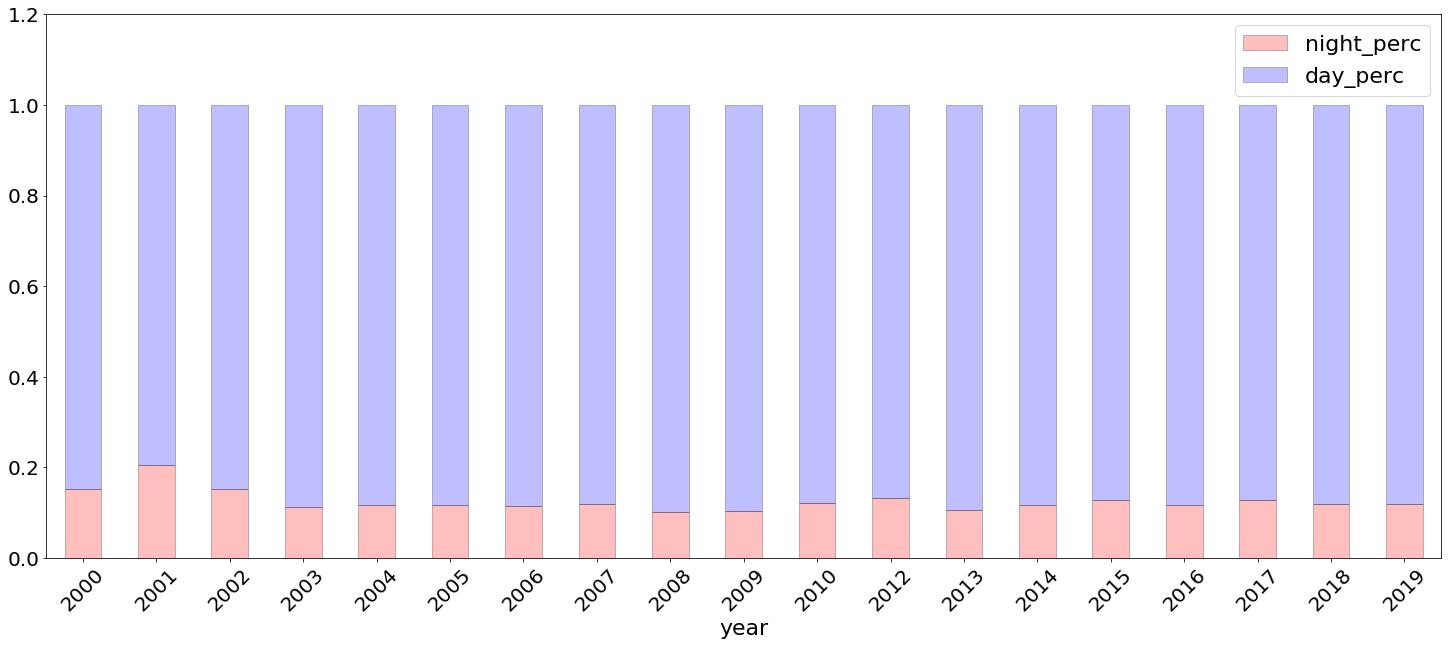

In [36]:
ax=df_perc.plot(kind='bar', x='year', y=['night_perc', 'day_perc'], rot=45, stacked=True,
            figsize=(25,10), fontsize=20, alpha=0.25, edgecolor='k', color=['r', 'b'])
plt.xlabel('year', fontsize=22)
plt.legend(fontsize=22)
plt.ylim(0.0, 1.2)


In [38]:
df_perc.day_counts.sum(), df_perc.night_counts.sum()

(54694136, 7516974)

In [39]:
df_perc

,year,day_counts,night_counts,total_counts,night_perc,day_perc
0,2000,181258,32465,213723,0.151902,0.848098
1,2001,1132077,291551,1423628,0.204794,0.795206
2,2002,2514300,449339,2963639,0.151617,0.848383
3,2003,3660353,469640,4129993,0.113714,0.886286
4,2004,3621212,478857,4100069,0.116792,0.883208
5,2005,3638143,486618,4124761,0.117975,0.882025
6,2006,3339248,430239,3769487,0.114137,0.885863
7,2007,3643010,498586,4141596,0.120385,0.879615
8,2008,3486630,393640,3880270,0.101447,0.898553
9,2009,3212997,371464,3584461,0.103632,0.896368
